#Team Members


1. Keerthana M - 20MIA1082
2. Karthick Roshan M - 20MIA1096
3.   Rachana Supriya N - 20MIA1136
4.   Srinivas Reddy P - 20MIA1163




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df=pd.read_csv('water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#Missing Value analysis

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

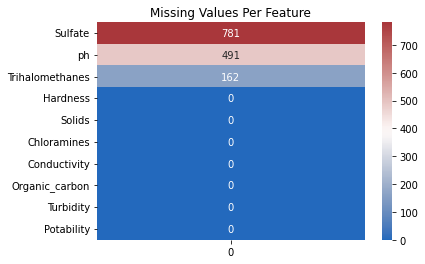

In [ ]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [ ]:
df.head(30)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


#Median Imputation

In [ ]:
df.median()

ph                     7.036752
Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Sulfate              333.073546
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.622485
Turbidity              3.955028
Potability             0.000000
dtype: float64

In [ ]:
df_mv=df.copy()
a=['ph','Sulfate','Trihalomethanes']
df_mv[a] = df_mv[a].fillna(df_mv[a].median())
df_mv.head(30)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,No
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,No
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,No
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,No
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,No
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,No
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,No
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,No
8,7.036752,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,No
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,No


#Outlier analysis

In [ ]:
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            #print(i)
    return outliers

In [ ]:
columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for i in columns: 
  print("Outliers in", i,":", len(detect_outliers_iqr(df_mv[i])))

Outliers in ph : 142
Outliers in Hardness : 83
Outliers in Solids : 47
Outliers in Chloramines : 61
Outliers in Sulfate : 264
Outliers in Conductivity : 11
Outliers in Organic_carbon : 25
Outliers in Trihalomethanes : 54
Outliers in Turbidity : 19


In [ ]:
df_cap = df_mv.copy()
for i in columns:
  Q1 = df_mv[i].quantile(0.25)
  Q3 = df_mv[i].quantile(0.75)
  IQR=Q3-Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  df_cap[i] = np.where(df_cap[i] > upper_limit,upper_limit,np.where(df_cap[i] < lower_limit,lower_limit,df_cap[i]))

In [ ]:
for i in columns: 
  print("Outliers in", i,":", len(detect_outliers_iqr(df_cap[i])))

Outliers in ph : 0
Outliers in Hardness : 0
Outliers in Solids : 0
Outliers in Chloramines : 0
Outliers in Sulfate : 0
Outliers in Conductivity : 0
Outliers in Organic_carbon : 0
Outliers in Trihalomethanes : 0
Outliers in Turbidity : 0


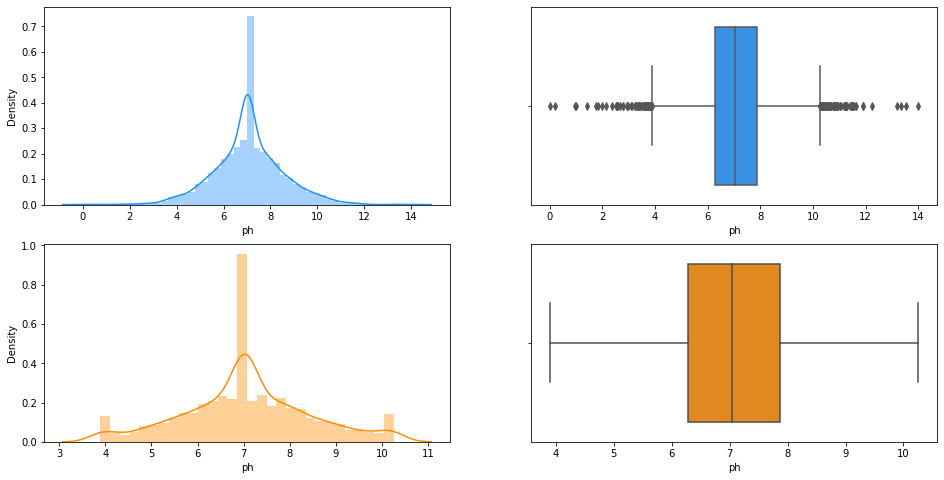

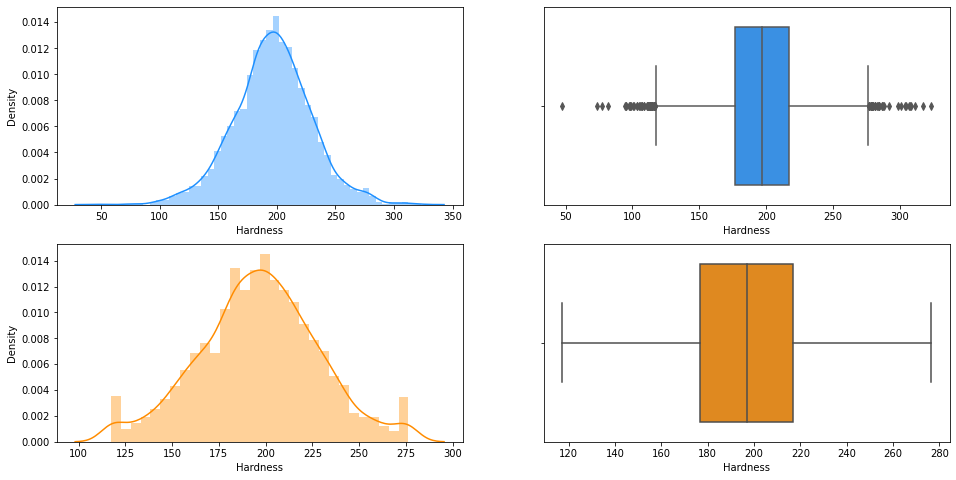

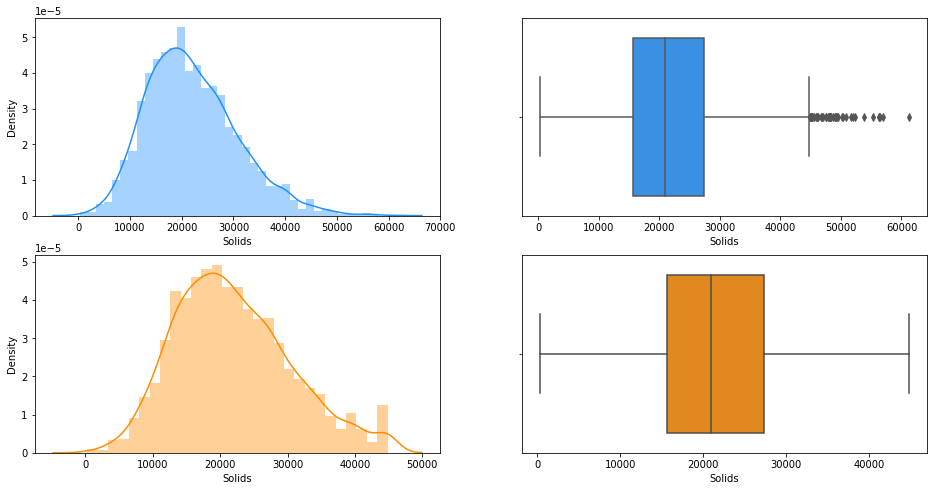

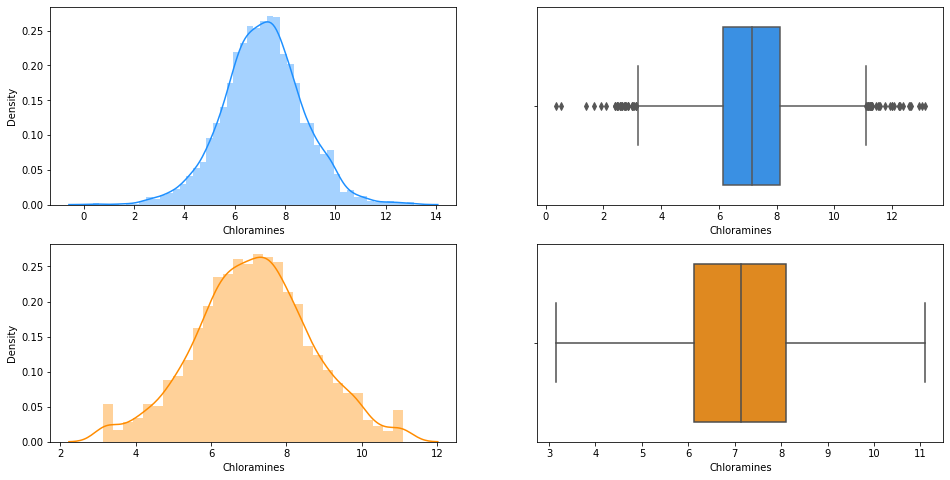

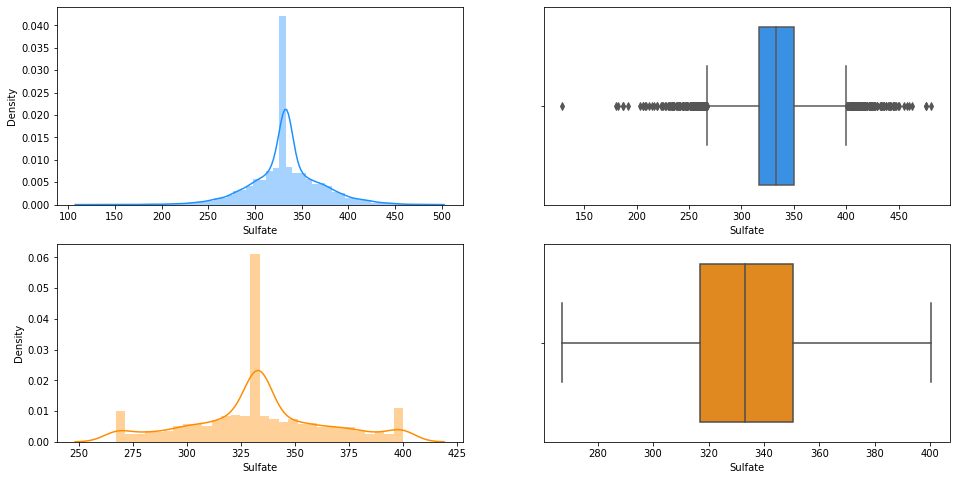

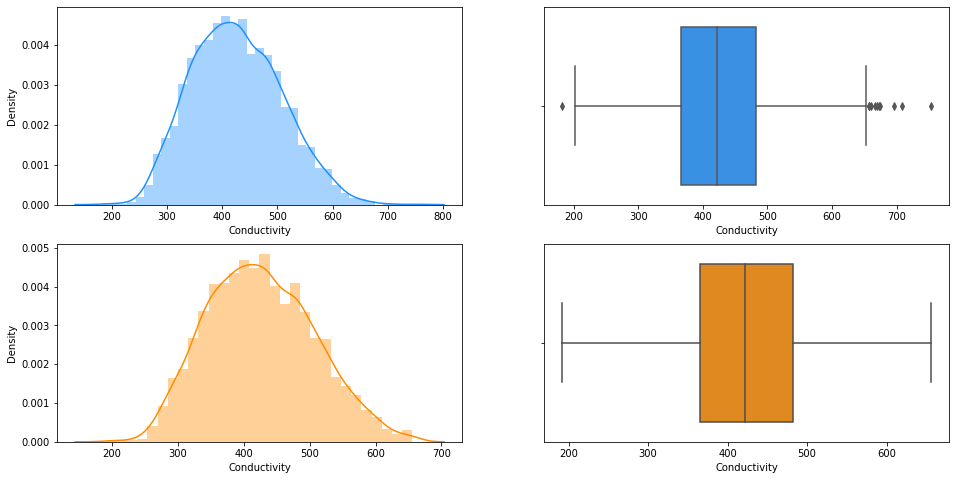

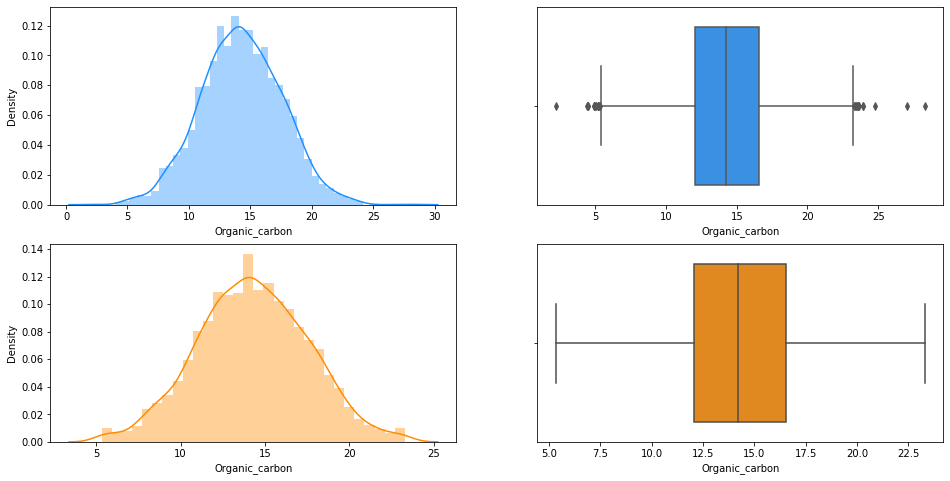

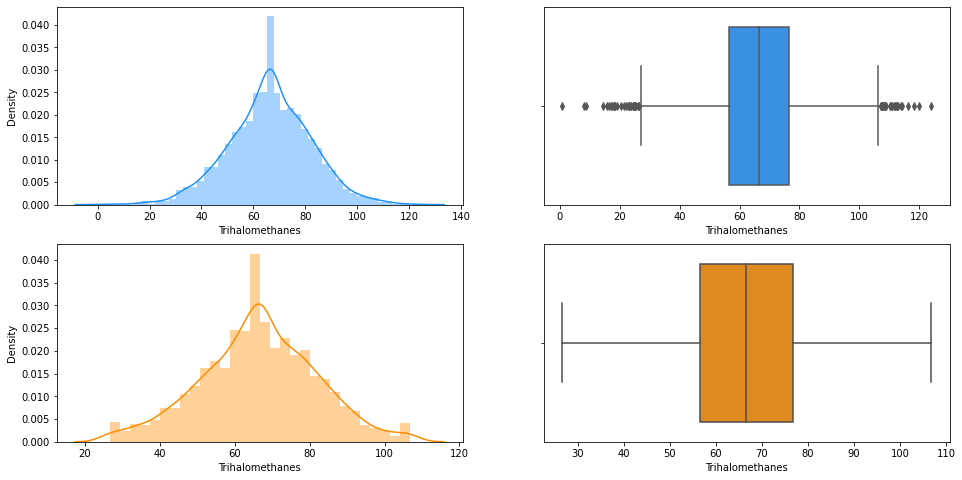

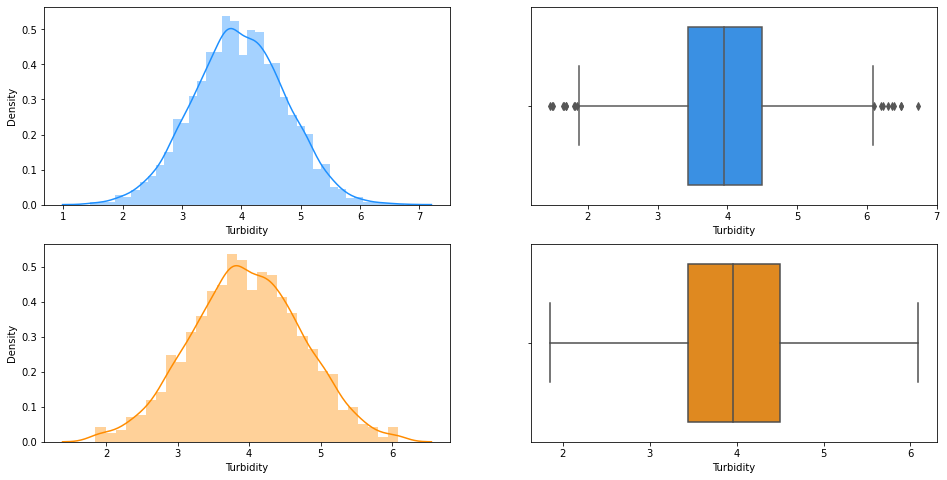

In [ ]:
for i in columns:
  plt.figure(figsize=(16,8))
  plt.subplot(2,2,1)
  sns.distplot(df_mv[i],color='dodgerblue' )
  plt.subplot(2,2,2)
  sns.boxplot(df_mv[i],color='dodgerblue' )
  plt.subplot(2,2,3)
  sns.distplot(df_cap[i],color='darkorange')
  plt.subplot(2,2,4)
  sns.boxplot(df_cap[i],color='darkorange')
  plt.show()

# Data Analysis

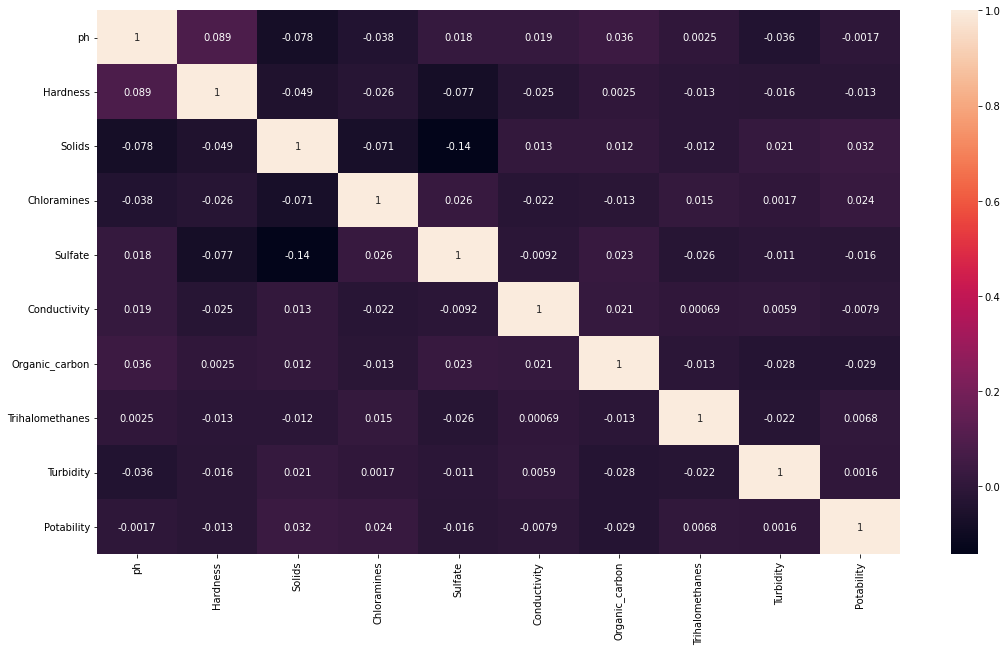

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(df_cap.corr(), cbar =True, annot = True)

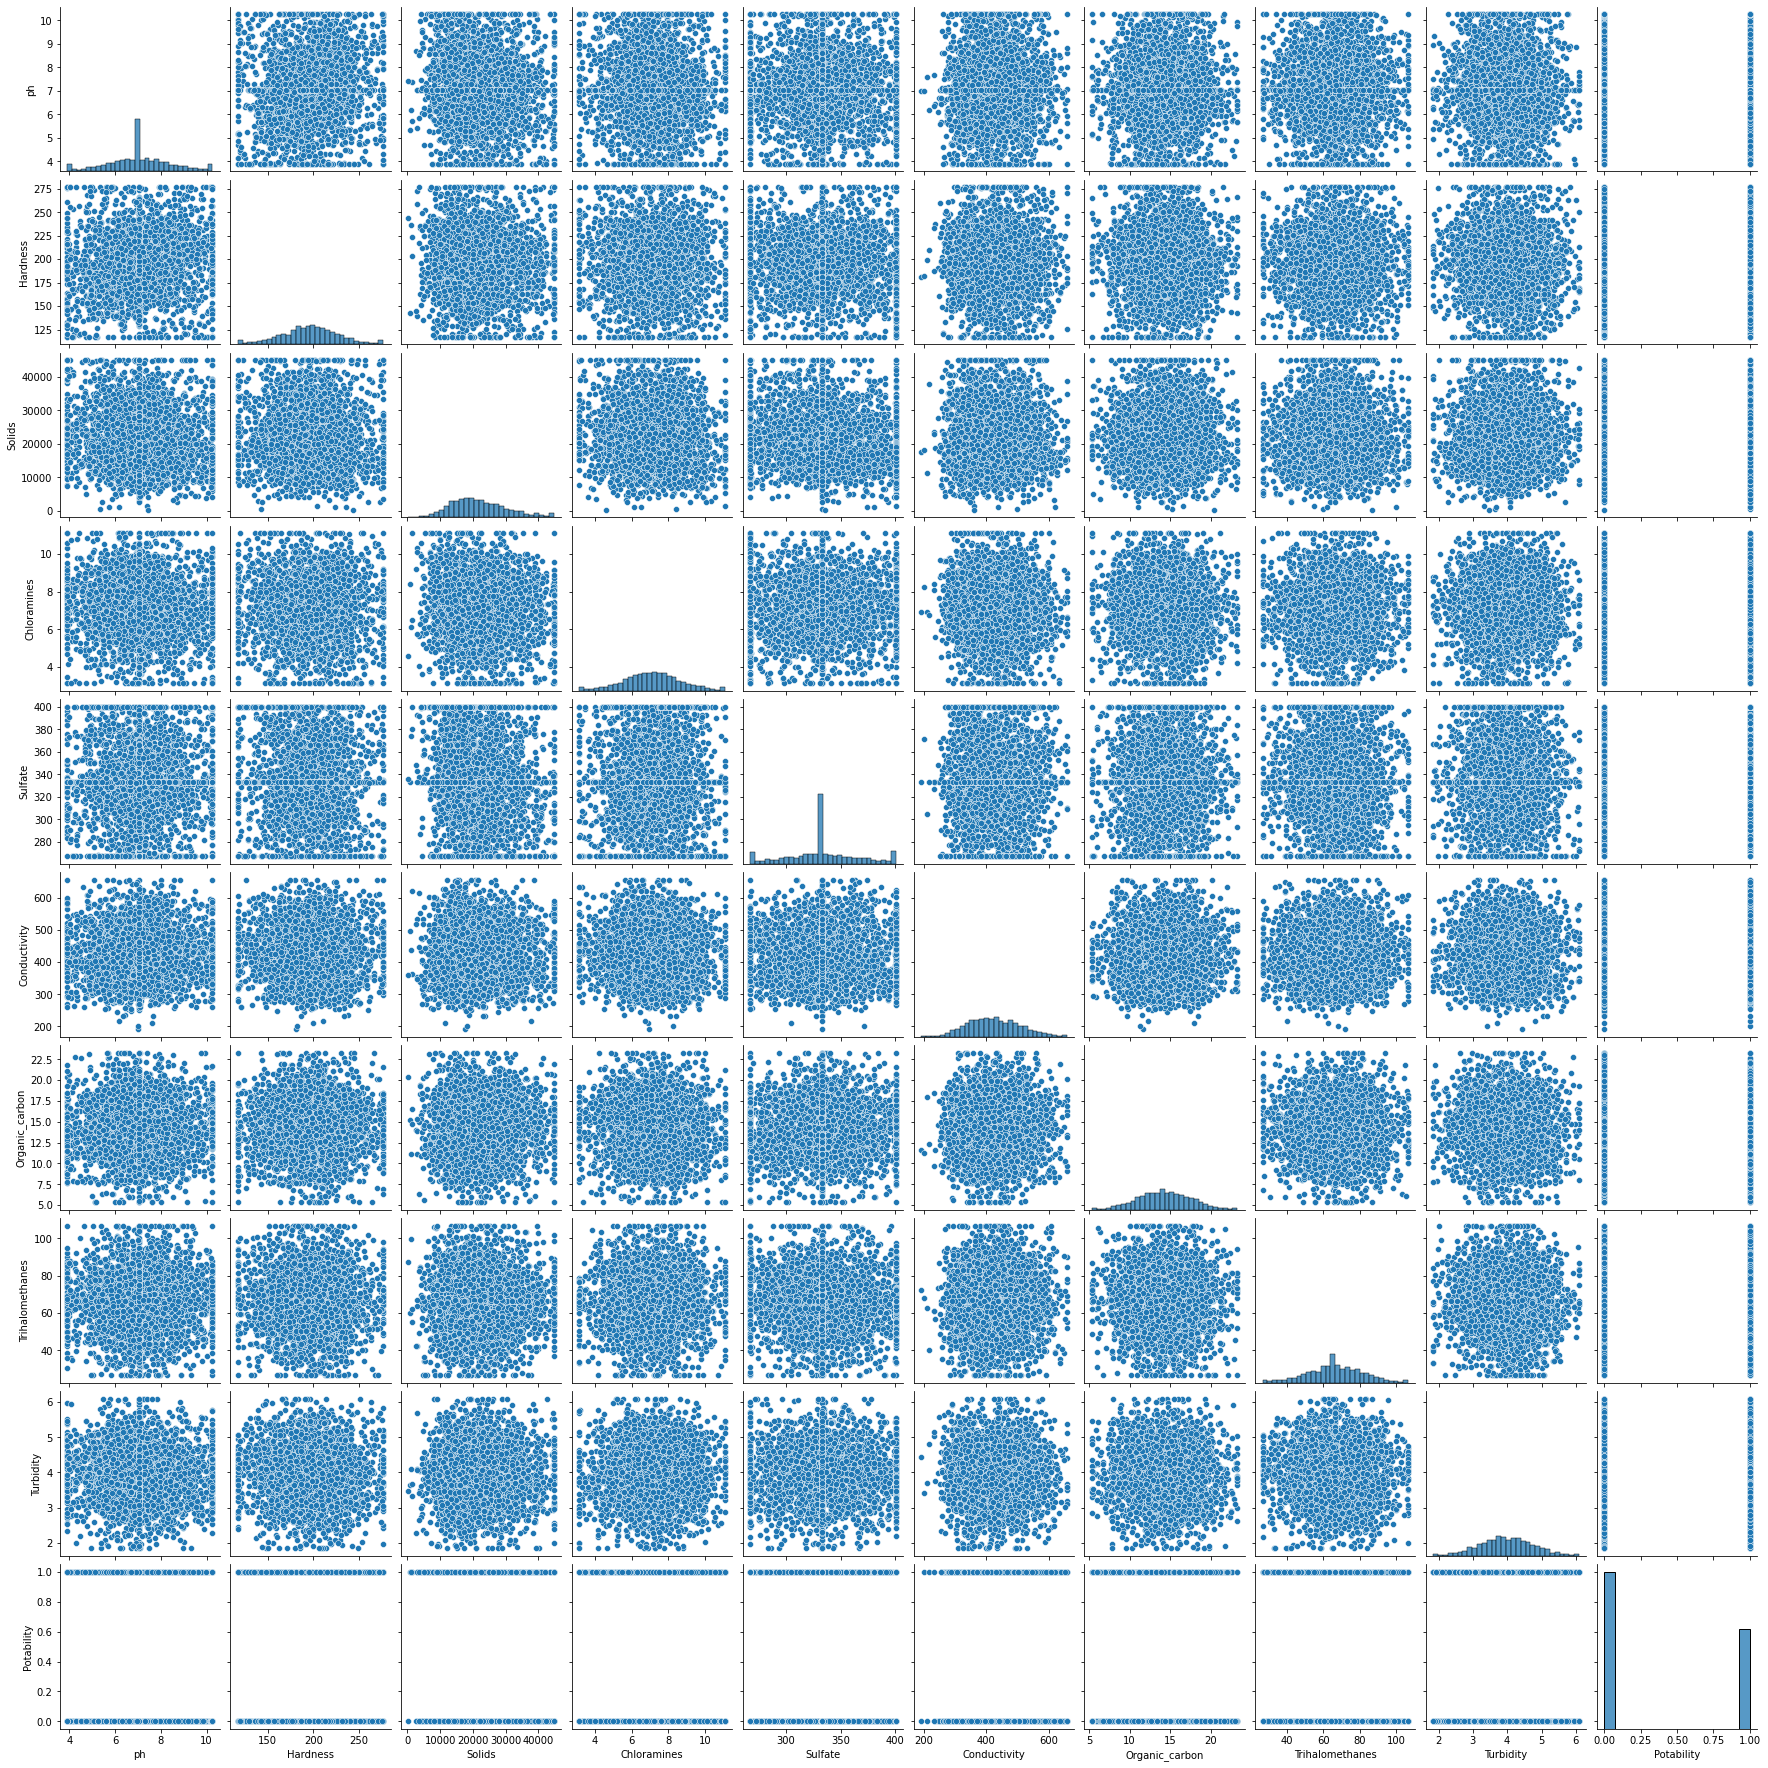

In [ ]:
sns.pairplot(df_cap)

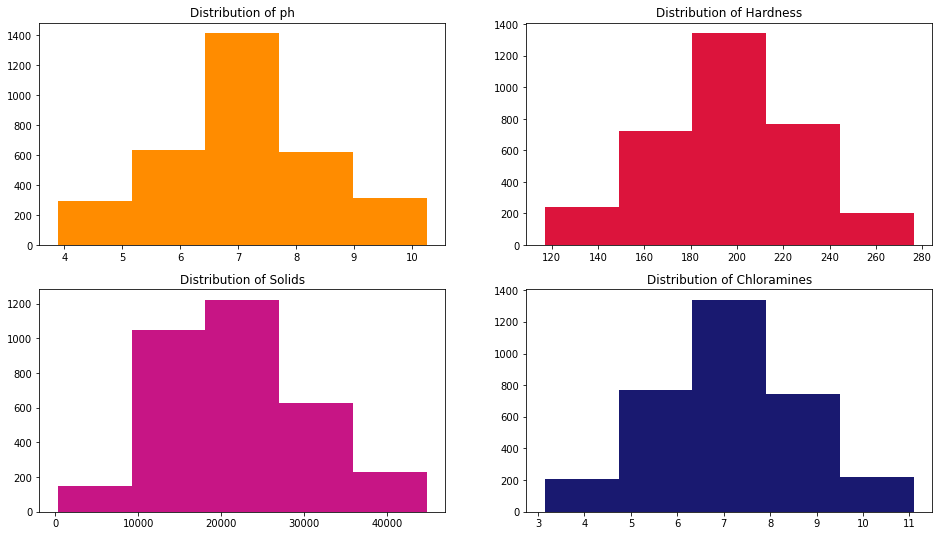

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of ph")
axes[0,0].hist(df_cap['ph'], bins=5, color='darkorange');
axes[0,1].set_title("Distribution of Hardness")
axes[0,1].hist(df_cap['Hardness'], bins=5, color='crimson');
axes[1,0].set_title("Distribution of Solids")
axes[1,0].hist(df_cap['Solids'],bins=5, color='mediumvioletred');
axes[1,1].set_title("Distribution of Chloramines")
axes[1,1].hist(df_cap['Chloramines'], bins=5, color='midnightblue');


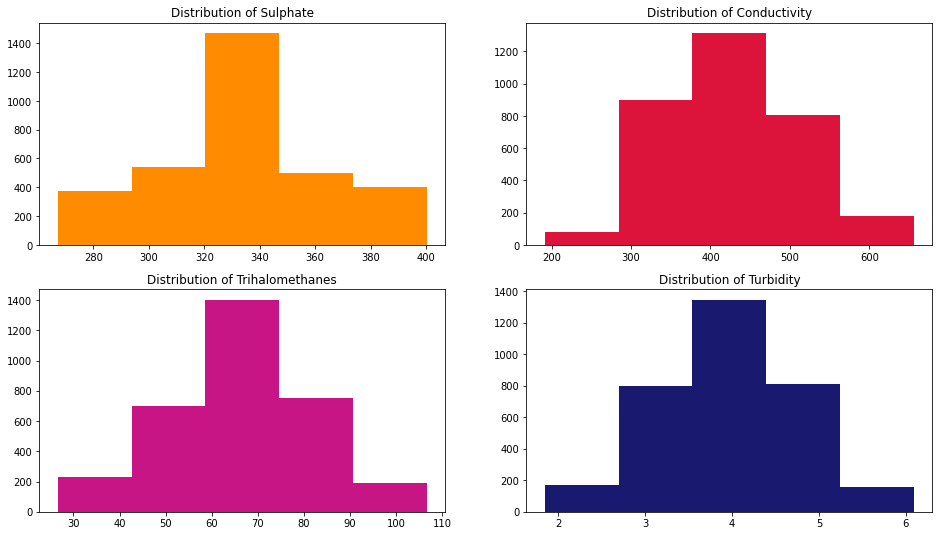

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sulphate")
axes[0,0].hist(df_cap['Sulfate'], bins=5, color='darkorange');
axes[0,1].set_title("Distribution of Conductivity")
axes[0,1].hist(df_cap['Conductivity'], bins=5, color='crimson');
axes[1,0].set_title("Distribution of Trihalomethanes")
axes[1,0].hist(df_cap['Trihalomethanes'],bins=5, color='mediumvioletred');
axes[1,1].set_title("Distribution of Turbidity")
axes[1,1].hist(df_cap['Turbidity'], bins=5, color='midnightblue');

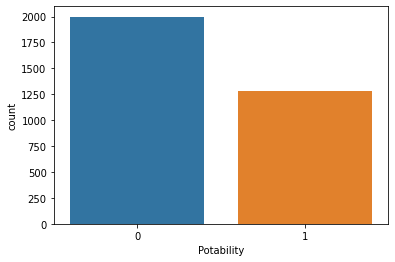

In [ ]:
sns.countplot(x ='Potability', data = df_cap)

In [ ]:
def threshold(x,col_name):
  threshold = x
  above = 0
  below = 0
  for i in df_cap[col_name].values:
    if i >=x:
      above += 1
    else:
      below += 1
  x = np.array(["Above","Below"])
  y = [above,below]
  plt.barh(x,y, color='lightseagreen')
  for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
  plt.xlabel(col_name)
  plt.show()

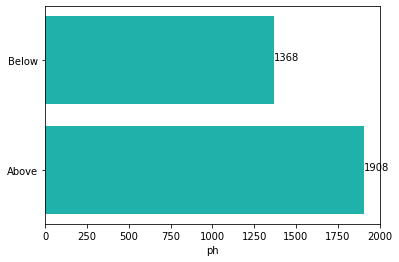

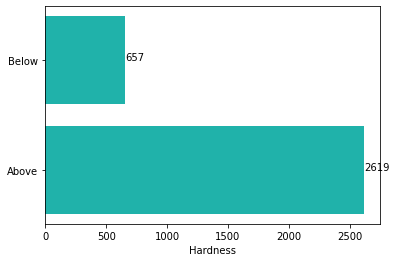

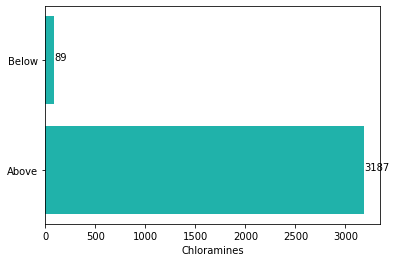

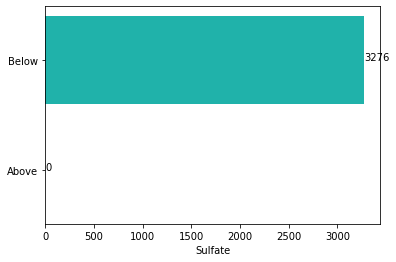

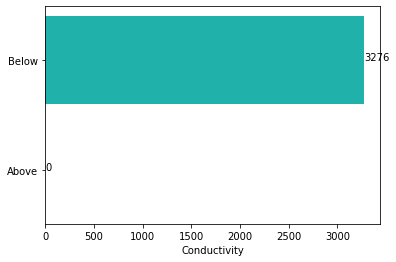

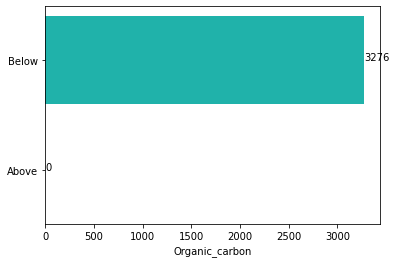

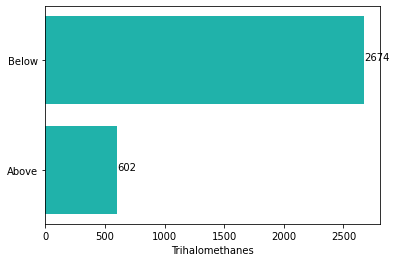

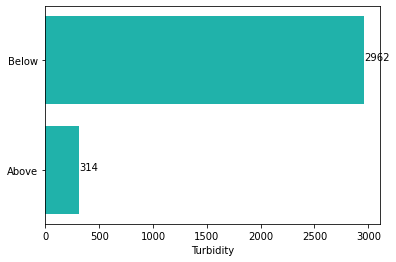

In [ ]:
thresholds = [7,170,4,500,800,25,80,5]
columns = ['ph','Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity',]

for i,(thr,col) in enumerate(zip(thresholds,columns)):
    threshold(thr,col)

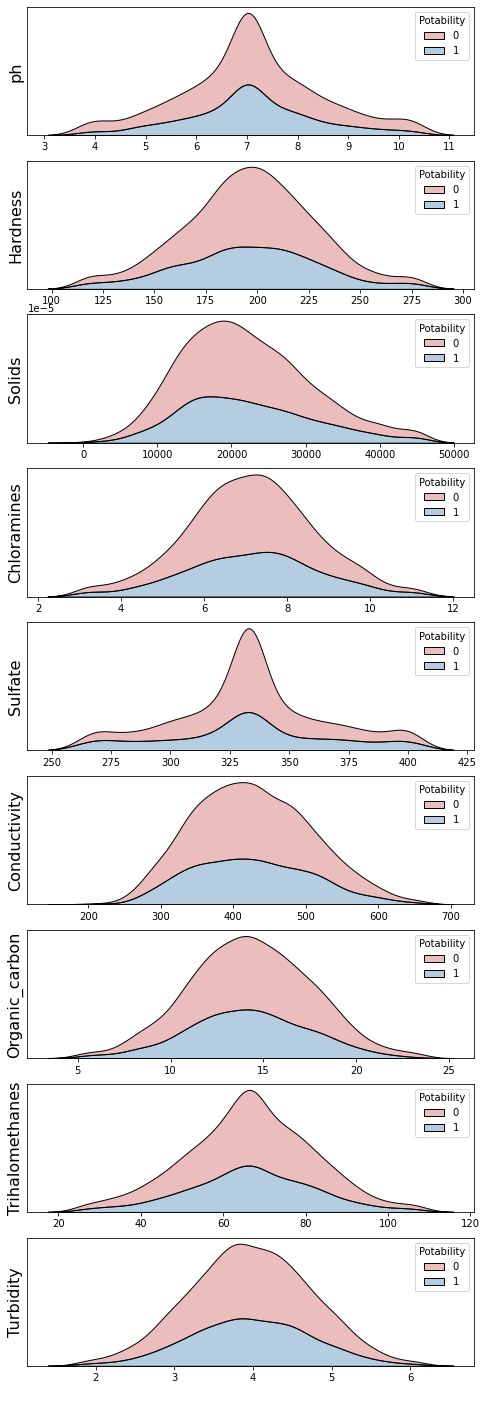

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=9, figsize=(8, 25))

features = list(df_cap.columns.drop('Potability'))
i=0
for cols in features:
    sns.kdeplot(df_cap[cols], fill=True, alpha=0.4, hue = df.Potability, 
                palette=('indianred', 'steelblue'), multiple='stack', ax=ax[i])

    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)
    i=i+1
      
plt.show()

#Train Test Split

In [ ]:
X = df_cap.iloc[:, :9]
y = df_cap.iloc[:, 9]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2620, 9)
X_test: (656, 9)
Y_train: (2620,)
Y_test: (656,)


#Modeling and Prediction

#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predd = dt.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_predd))

0.600609756097561


In [ ]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       405
           1       0.48      0.50      0.49       251

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predition = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

1.0

In [ ]:
reg_rf.score(X_test, y_test)

0.6509146341463414

In [ ]:
print(classification_report(y_test,y_predition))

              precision    recall  f1-score   support

          No       0.68      0.83      0.75       405
         Yes       0.57      0.37      0.45       251

    accuracy                           0.65       656
   macro avg       0.62      0.60      0.60       656
weighted avg       0.64      0.65      0.63       656



# XG BOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()

In [ ]:
model_xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
pred_xgb = model_xgb.predict(X_test)

In [ ]:
xgb =  metrics.accuracy_score(y_test, pred_xgb)
print(xgb)

0.6661585365853658


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       405
           1       0.64      0.29      0.40       251

    accuracy                           0.67       656
   macro avg       0.66      0.59      0.58       656
weighted avg       0.66      0.67      0.63       656



# HYPERPARAMETRIC TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]

In [ ]:
#Creating a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
#Random search of parameters, using 3 fold cross validation, 
#Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 3, verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   5.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   4.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   6.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [ ]:
new_reg_rf = RandomForestClassifier(n_estimators = 700,min_samples_split= 10,min_samples_leaf= 2,max_features= 'auto',max_depth= 10)

In [ ]:
new_reg_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=700)

In [ ]:
new_y_pred = new_reg_rf.predict(X_test)

In [ ]:
new_reg_rf.score(X_test, y_test)

0.6692073170731707

#Analysis after modeling

In [ ]:
dt_acc= 0.592987
rf_acc = 0.685975
xgb_acc = 0.666158
dt_pre = 0.58
rf_pre = 0.65
xgb_pre = 0.66
dt_rec = 0.58
rf_rec = 0.62
xgb_rec = 0.59
dt_f1 = 0.58
rf_f1 = 0.62
xgb_f1 = 0.58

In [ ]:
metrics = {
'Classifier' : ["Decision tree","Random forest","XG boost"],
'Accuracy' : [dt_acc,rf_acc,xgb_acc],
'Precision' : [dt_pre,rf_pre,xgb_pre],
'Recall' : [dt_rec,rf_rec,xgb_rec],
'F1 Score' : [dt_f1,rf_f1,xgb_f1]
}
metrics = pd.DataFrame(metrics)
metrics

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.592987,0.58,0.58,0.58
1,Random forest,0.685975,0.65,0.62,0.62
2,XG boost,0.666158,0.66,0.59,0.58


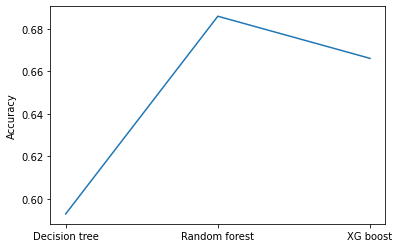

In [ ]:
plt.plot(metrics['Classifier'],metrics['Accuracy'])
plt.ylabel('Accuracy')
plt.show() 

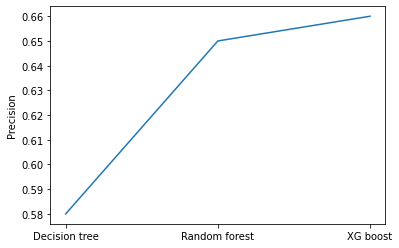

In [ ]:
plt.plot(metrics['Classifier'],metrics['Precision'])
plt.ylabel('Precision')
plt.show()

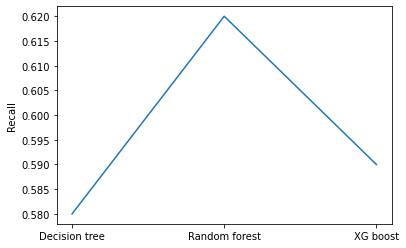

In [ ]:
plt.plot(metrics['Classifier'],metrics['Recall'])
plt.ylabel('Recall')
plt.show()

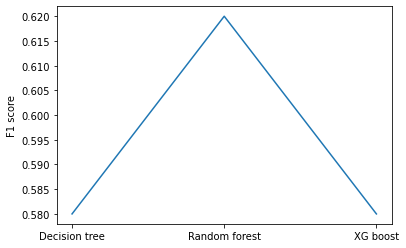

In [ ]:
plt.plot(metrics['Classifier'],metrics['F1 Score'])
plt.ylabel('F1 score')
plt.show()